# Lets place this notebook in the root directory

In [5]:
import os
path = %pwd
if path.split(os.sep)[-1] == 'notebooks':
    %cd ..

/mnt/c/Users/Mustapha/Documents/competitions/klee_project_audio


Lets also refresh all our dependecies in run time

In [6]:
%reload_ext autoreload
%autoreload 2

load environment variables, if they exist

In [7]:
from dotenv import load_dotenv

load_dotenv(".env_consts")

True

# Imports

In [8]:
# -------------------------------- torch stuff ------------------------------- #
import torch

# ----------------------------------- other ---------------------------------- #
from tqdm import tqdm
import wandb

# ---------------------------------- Custom ---------------------------------- #
from src.load_dataset_fft_aug import get_splitter_dataloaders_fft

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Get data

In [197]:
F16 = torch.float16
F32 = torch.float32
F64 = torch.float64
FTYPE = F32
TRAIN_SPLIT = float(os.getenv('KLEE_TRAIN_SPLIT', 0.8))
BATCH_SIZE = int(os.getenv('KLEE_BATCH_SIZE', 64))
kwargs = {
        "BATCH_SIZE": BATCH_SIZE,
        "TRAIN_SPLIT": TRAIN_SPLIT,
        "FTYPE": FTYPE,
        "fft_nperseg": 400,
        "fft_noverlap": 240,
        "fft_window_type": "tukey",
        "fft_in_db": False,
        }

print("kwargs : ",kwargs)
train_loader, val_loader, data = get_splitter_dataloaders_fft(**kwargs)

kwargs :  {'BATCH_SIZE': 8, 'TRAIN_SPLIT': 0.8, 'FTYPE': torch.float32, 'fft_nperseg': 400, 'fft_noverlap': 240, 'fft_window_type': 'tukey', 'fft_in_db': False}


Caching dataset: 100%|██████████| 286/286 [00:03<00:00, 82.40it/s] 


### debug

tensor(3.6753e+08)
target :  tensor([2, 2])


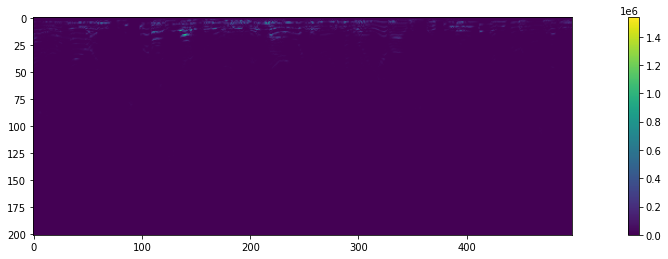

In [198]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy
data.add_noise = False
fft, target = data[150]
# print("norm", np.linalg.norm(fft, axis=0, keepdims=True))
# fft /= np.linalg.norm(fft, axis=1, keepdims=True) + 1e-8
print(fft.sum())
print("target : ",target)
plt.figure(figsize=(20, 4))
plt.imshow(fft[0])
plt.colorbar()
plt.show()

In [199]:
fft.squeeze(0).shape

torch.Size([201, 498])

In [200]:
import soundfile as sf
from utils.vscode_audio import Audio

time, clip = scipy.signal.istft(fft.squeeze(0).numpy(), fs=16000, nperseg=kwargs["fft_nperseg"], noverlap=kwargs["fft_noverlap"], window=kwargs["fft_window_type"])
print(len(time))
Audio(clip, 16000)

79520


In [156]:
for d in train_loader:
    print(d)
    break

Adding noise


/mnt/c/Users/Mustapha/Documents/competitions/klee_project_audio/src/load_dataset_fft_aug.py:124: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  else :


Adding noiseAdding noise
Adding noise


/mnt/c/Users/Mustapha/Documents/competitions/klee_project_audio/src/load_dataset_fft_aug.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  else :
/mnt/c/Users/Mustapha/Documents/competitions/klee_project_audio/src/load_dataset_fft_aug.py:124: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  else :


/mnt/c/Users/Mustapha/Documents/competitions/klee_project_audio/src/load_dataset_fft_aug.py:124: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  else :
/mnt/c/Users/Mustapha/Documents/competitions/klee_project_audio/src/load_dataset_fft_aug.py:124: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to eith

Adding noise

/mnt/c/Users/Mustapha/Documents/competitions/klee_project_audio/src/load_dataset_fft_aug.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  else :


Adding noise

/mnt/c/Users/Mustapha/Documents/competitions/klee_project_audio/src/load_dataset_fft_aug.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  else :




Adding noiseAdding noiseAdding noise
Adding noise


Adding noiseAdding noise
Adding noiseAdding noise


Adding noiseAdding noiseAdding noiseAdding noise



Adding noiseAdding noiseAdding noiseAdding noise



Adding noiseAdding noiseAdding noiseAdding noise


Adding noise
Adding noiseAdding noiseAdding noise



Adding noise
Adding noiseAdding noiseAdding noiseAdding noise



Adding noise
Adding noiseAdding noise
Adding noiseAdding noise

Adding noiseAdding noise


Adding noiseAdding noise
Adding noise
Adding noise
Adding noiseAdding noise


Adding noiseAdding noise
Adding noise
Adding noise
Adding noiseAdding noise

Adding noise
Adding noiseAdding noise

Adding noise
Adding noise
Adding noise
Adding noise

Adding noiseAdding noiseAdding noise


Adding noise
Adding noise
Adding noiseAdding noise
Adding noise

Adding noise
Adding noise
Adding noise
[tensor([[[[3.0017e-03, 2.1031e-04, 1.2963e-03,  ..., 7.2196e-05,
           1.9313e-03, 1.5726e-03],
          [5.0007e-03, 5.4669e-03, 1.0

In [8]:
example, lab = train_loader.dataset[0]
example.shape  # (channel, frequency, time)

torch.Size([1, 201, 498])

# WandB

In [9]:
wandb.init(project="klee_project_audio", entity="mustapha")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: mustapha (use `wandb login --relogin` to force relogin)


# Original model CRNN

### Create model

In [10]:
class PermuteForLSTM(torch.nn.Module):
    """
    Permute the input from (batch, channel, freq, time) to (batch, time, freq, channel)
    """
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return x.permute(0, 3, 2, 1)
    

class ReshapForLSTM(torch.nn.Module):
    """
    Reshape the input from (batch, time, freq, channel) to (batch, time, freq*channel)
    """
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return x.reshape(x.shape[0], x.shape[1], -1)

class SequentialLSTM(torch.nn.Module):
    """
    LSTMs in Pytorch, outputs a tuple (output, (h_n, c_n)), we only need output
    """
    def __init__(self, input_size=1280, hidden_size=40, num_layers=1, dropout=0):
        super().__init__()
        self.lstm = torch.nn.LSTM(input_size, hidden_size, num_layers, dropout=dropout)
    def forward(self, x):
        x, _ = self.lstm(x)
        return x

In [11]:
# torch sequential
class Parameters():
    def __init__(self, parameters):
        self.__dict__.update(parameters)

def CRNN(p):
    return torch.nn.Sequential( #input size = 80000
        torch.nn.Conv2d(1, 64, kernel_size=3),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64, 32, kernel_size=3),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=3),
        
        torch.nn.Conv2d(32, 128, kernel_size=3),
        torch.nn.ReLU(),
        torch.nn.Conv2d(128, 64, kernel_size=3),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=3),
        
        torch.nn.Dropout(p.dropout),
        #permute 3 with 1
        PermuteForLSTM(),
        ReshapForLSTM(),
        SequentialLSTM(1280, 40), # 1280 = 20 freq *64 channels
        torch.nn.Tanh(),
        torch.nn.MaxPool1d(kernel_size=2, stride=2),
        
        
#         torch.nn.Conv2d(64, 64, kernel_size=5, stride=5),
#         torch.nn.ReLU(),
        
        
        torch.nn.Flatten(),
        torch.nn.Linear(53*20, 11), # Original contains 52*20, I don't know why !
        torch.nn.Softmax(dim=1)        
        
#         torch.nn.Linear(2560, 11), # Original contains 52*20, I don't know why !
#         torch.nn.Softmax(dim=1)
    )

params = Parameters({
    "dropout": 0.2,
})
model = CRNN(params)

In [12]:
model(example.unsqueeze(0)).shape

torch.Size([1, 11])

### Train model

In [13]:
LEARNING_RATE = 2e-3
EPOCHS = 700
MODEL_DROPOUT = params.dropout
EVAL_EACH = 10

wandb.config.update({
    "learning_rate": LEARNING_RATE,
    "epochs": EPOCHS,
    "MODEL" : "RCNN",
    "MODEL_DROPOUT": MODEL_DROPOUT,
    "OPTIMIZER": "ADAM",
    # "batch_size": BATCH_SIZE,
    **kwargs
})

In [ ]:
mae = torch.nn.L1Loss()
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
model.to("cuda")

# wandb.watch(model, log_freq=1)
for epoch in range(EPOCHS):
    # -------------------------------- Train loop -------------------------------- #
    train_mean_loss = 0
    train_mean_count_loss = 0
    for d in tqdm(train_loader, "training loop"):
        audios = d[0].to("cuda")
        labels = d[1]
        # one hot encode labels
        count_labels = labels.sum(axis=1)
        one_hot_label = torch.eye(11)[count_labels].to("cuda")
        # forward pass
        predictions = model.forward(audios)
        # count loss
        count_loss_value = loss(predictions, one_hot_label)
        train_mean_count_loss += count_loss_value.item()
        #optimize
        optimizer.zero_grad()
        count_loss_value.backward()
        optimizer.step()
    print("Epoch {}/{}".format(epoch+1, EPOCHS))
    print("Train count Loss : {:.4f}".format(train_mean_count_loss/len(train_loader)))
    log = {
        "CrossEntropy_train_count_loss":train_mean_count_loss/len(train_loader),
        "epoch":epoch
        }
    # --------------------------------- Eval loop -------------------------------- #
    if (epoch+1)%EVAL_EACH == 0:
        val_mean_loss = 0
        val_mean_count_loss = 0
        model.eval()
        for d in tqdm(val_loader, "evaluation loop"):
            audios = d[0].to("cuda")
            labels = d[1]
            # one hot encode labels
            count_labels = labels.sum(axis=1)
            one_hot_label = torch.eye(11)[count_labels].to("cuda")
            # forward pass
            predictions = model.forward(audios)
            # count loss
            count_loss_value = mae(predictions, one_hot_label)
            val_mean_count_loss += count_loss_value.item()
        model.train()
        log["MAE_val_count_loss"] = val_mean_count_loss/len(val_loader)
        print("validation count Loss : {:.4f}".format(val_mean_count_loss/len(val_loader)))
        
    wandb.log(log)

training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 1/700
Train count Loss : 2.3959


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 2/700
Train count Loss : 2.2686


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 3/700
Train count Loss : 2.2113


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


Epoch 4/700
Train count Loss : 2.1915


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.93it/s]


Epoch 5/700
Train count Loss : 2.1559


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 6/700
Train count Loss : 2.1338


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 7/700
Train count Loss : 2.1036


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 8/700
Train count Loss : 2.0854


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 9/700
Train count Loss : 2.0702


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 10/700
Train count Loss : 2.0479


evaluation loop: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]


validation count Loss : 0.1146


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


Epoch 11/700
Train count Loss : 2.0359


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


Epoch 12/700
Train count Loss : 2.0138


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.93it/s]


Epoch 13/700
Train count Loss : 2.0093


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 14/700
Train count Loss : 1.9922


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 15/700
Train count Loss : 1.9737


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 16/700
Train count Loss : 1.9705


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 17/700
Train count Loss : 1.9618


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 18/700
Train count Loss : 1.9487


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 19/700
Train count Loss : 1.9434


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


Epoch 20/700
Train count Loss : 1.9374


evaluation loop: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]


validation count Loss : 0.1106


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.93it/s]


Epoch 21/700
Train count Loss : 1.9330


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 22/700
Train count Loss : 1.9184


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 23/700
Train count Loss : 1.9101


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 24/700
Train count Loss : 1.9070


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 25/700
Train count Loss : 1.8970


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 26/700
Train count Loss : 1.8921


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 27/700
Train count Loss : 1.8852


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


Epoch 28/700
Train count Loss : 1.8836


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.93it/s]


Epoch 29/700
Train count Loss : 1.8768


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 30/700
Train count Loss : 1.8754


evaluation loop: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]


validation count Loss : 0.1133


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 31/700
Train count Loss : 1.8717


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 32/700
Train count Loss : 1.8626


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 33/700
Train count Loss : 1.8559


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 34/700
Train count Loss : 1.8647


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 35/700
Train count Loss : 1.8520


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 36/700
Train count Loss : 1.8425


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.93it/s]


Epoch 37/700
Train count Loss : 1.8504


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 38/700
Train count Loss : 1.8331


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 39/700
Train count Loss : 1.8267


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 40/700
Train count Loss : 1.8224


evaluation loop: 100%|██████████| 18/18 [00:02<00:00,  6.30it/s]


validation count Loss : 0.1099


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 41/700
Train count Loss : 1.8147


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 42/700
Train count Loss : 1.8161


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 43/700
Train count Loss : 1.8151


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 44/700
Train count Loss : 1.8073


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


Epoch 45/700
Train count Loss : 1.8081


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 46/700
Train count Loss : 1.8018


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 47/700
Train count Loss : 1.7999


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 48/700
Train count Loss : 1.7950


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 49/700
Train count Loss : 1.7971


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 50/700
Train count Loss : 1.7841


evaluation loop: 100%|██████████| 18/18 [00:02<00:00,  6.24it/s]


validation count Loss : 0.1076


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 51/700
Train count Loss : 1.7834


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 52/700
Train count Loss : 1.7799


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


Epoch 53/700
Train count Loss : 1.7791


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 54/700
Train count Loss : 1.7805


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 55/700
Train count Loss : 1.7733


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 56/700
Train count Loss : 1.7698


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 57/700
Train count Loss : 1.7653


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.97it/s]


Epoch 58/700
Train count Loss : 1.7666


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.96it/s]


Epoch 59/700
Train count Loss : 1.7610


training loop: 100%|██████████| 72/72 [00:36<00:00,  1.95it/s]


Epoch 60/700
Train count Loss : 1.7579


evaluation loop: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]


validation count Loss : 0.1068


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


Epoch 61/700
Train count Loss : 1.7611


training loop: 100%|██████████| 72/72 [00:37<00:00,  1.94it/s]


Epoch 62/700
Train count Loss : 1.7595


training loop:  32%|███▏      | 23/72 [00:11<00:25,  1.96it/s]

### Prediction

In [75]:
from time import time
val_mean_loss = 0
val_mean_count_loss = 0
model.eval()
tik = time()
for d in tqdm(val_loader, "evaluation loop"):
    audios = d[0].to("cuda")
    labels = d[1]
    # one hot encode labels
    count_labels = torch.tensor(labels.sum(axis=1), dtype=torch.float32).to("cuda")
    # forward pass
    predictions = torch.argmax(model.forward(audios), axis=1)
    # count loss
    count_loss_value = torch.abs(predictions - count_labels).mean()
    val_mean_count_loss += count_loss_value.item()
tok = time()
model.train()
log["MAE_val_count_loss_regression"] = val_mean_count_loss/len(val_loader)
log["eval_duration"] = tok-tik
print("validation count Loss : {:.4f}".format(val_mean_count_loss/len(val_loader)))

wandb.log(log)

evaluation loop:   0%|          | 0/36 [00:00<?, ?it/s]/tmp/ipykernel_4676/4147267797.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  count_labels = torch.tensor(labels.sum(axis=1), dtype=torch.float32).to("cuda")
evaluation loop:   8%|▊         | 3/36 [00:00<00:06,  5.26it/s]

tensor([ 2.,  4.,  1.,  1.,  4.,  6.,  2.,  1.,  5., 10.,  9.,  9.,  6.,  3.,
        10.,  0.,  6.,  9.,  4.,  3.,  7.,  9., 10.,  3.,  4.,  6.,  5.,  2.,
         0.,  8.,  6.,  6.], device='cuda:0')
tensor([ 1,  4,  1,  1,  5,  6,  2,  1,  6, 10,  8, 10,  5,  3, 10,  0,  6, 10,
         4,  3,  8, 10, 10,  2,  4,  8,  6,  2,  0, 10,  6,  6],
       device='cuda:0')
tensor(0.4688, device='cuda:0')
tensor([ 2.,  8.,  1.,  9.,  5.,  5.,  2.,  1.,  2.,  8.,  3.,  7.,  4.,  3.,
         9.,  4.,  2.,  0.,  8.,  3.,  2.,  6.,  6.,  5.,  7.,  1.,  8.,  4.,
         9.,  3., 10.,  0.], device='cuda:0')
tensor([ 2, 10,  1,  9,  4,  4,  1,  1,  2,  6,  3,  7,  4,  3,  9,  4,  2,  0,
         8,  3,  2,  4,  7,  5,  5,  1,  7,  6,  8,  2,  8,  0],
       device='cuda:0')
tensor(0.5938, device='cuda:0')
tensor([ 6.,  0., 10.,  3.,  4.,  2.,  2.,  6.,  0.,  6.,  2.,  5.,  8.,  9.,
         6.,  3.,  1.,  9.,  0.,  9.,  9.,  2.,  8.,  2., 10.,  7.,  5.,  4.,
         3.,  1., 10.,  9.], device='c

evaluation loop:  14%|█▍        | 5/36 [00:00<00:04,  7.56it/s]

tensor([ 1.,  6.,  7.,  7.,  5.,  6.,  5.,  0.,  2.,  6.,  4.,  5.,  3.,  9.,
        10.,  4.,  1.,  5.,  3.,  9.,  4.,  5.,  0.,  6.,  0.,  3.,  0., 10.,
         9.,  3.,  9.,  0.], device='cuda:0')
tensor([ 1,  6,  9,  9,  5,  7,  5,  0,  2,  4,  3,  5,  3,  8, 10,  4,  2,  5,
         4,  9,  5,  8,  0, 10,  0,  2,  0, 10,  5,  2, 10,  0],
       device='cuda:0')
tensor(0.8125, device='cuda:0')
tensor([3., 6., 6., 2., 1., 9., 3., 3., 6., 1., 2., 3., 5., 1., 9., 8., 4., 1.,
        2., 4., 7., 0., 9., 8., 8., 4., 6., 5., 1., 0., 0., 2.],
       device='cuda:0')
tensor([ 2,  6,  8,  2,  1, 10,  3,  4,  6,  2,  2,  2,  5,  2,  8,  7,  5,  1,
         2,  4,  5,  0,  8,  7, 10,  4,  6,  4,  2,  0,  0,  2],
       device='cuda:0')
tensor(0.5938, device='cuda:0')
tensor([ 8.,  9.,  3.,  7.,  5.,  6.,  7.,  0.,  7.,  4.,  5.,  4.,  3.,  1.,
        10.,  6.,  4.,  0.,  1.,  0.,  7.,  9.,  8.,  7.,  5.,  7.,  3.,  3.,
         5.,  8.,  8.,  2.], device='cuda:0')
tensor([ 8, 10,  2,  8,  

evaluation loop:  25%|██▌       | 9/36 [00:01<00:02, 10.36it/s]

tensor([ 9.,  2.,  5.,  2.,  7.,  2.,  2.,  4.,  1.,  5., 10.,  5.,  8., 10.,
        10.,  8., 10.,  7.,  3.,  2.,  3.,  2.,  1.,  9.,  7.,  7.,  7.,  8.,
         2.,  0.,  1.,  8.], device='cuda:0')
tensor([ 9,  1,  7,  2,  5,  2,  1,  3,  1,  5,  8,  4,  8,  8,  8,  8, 10,  8,
         3,  2,  3,  1,  1,  9,  4,  9,  9, 10,  2,  0,  1,  7],
       device='cuda:0')
tensor(0.8125, device='cuda:0')
tensor([ 5., 10.,  8.,  6., 10.,  3.,  9.,  8.,  9.,  0.,  9.,  4.,  9.,  3.,
         8.,  0.,  1.,  9.,  2.,  6., 10.,  2.,  4.,  3.,  6.,  4.,  3.,  4.,
         1.,  8.,  9.,  7.], device='cuda:0')
tensor([ 5,  8, 10,  7,  9,  4, 10, 10,  9,  0,  7,  4,  9,  3,  9,  0,  1, 10,
         2,  6,  8,  2,  3,  4,  8,  3,  2,  4,  1,  7, 10,  8],
       device='cuda:0')
tensor(0.7812, device='cuda:0')
tensor([ 8.,  3.,  9., 10.,  9.,  1.,  5.,  0.,  6.,  8.,  4.,  8.,  9.,  8.,
         5.,  2.,  9.,  9.,  9., 10.,  5.,  5.,  2.,  9.,  6.,  5.,  7.,  8.,
         1.,  1.,  4.,  5.], device='c

evaluation loop:  31%|███       | 11/36 [00:01<00:02, 11.19it/s]

tensor([ 1.,  4., 10.,  9.,  0.,  8.,  7.,  7.,  9.,  0.,  0.,  9.,  0.,  4.,
         5.,  1.,  5.,  7.,  2., 10.,  1.,  6.,  9.,  0.,  0.,  7.,  7.,  6.,
         4.,  2.,  0.,  8.], device='cuda:0')
tensor([ 1,  4,  9, 10,  0, 10,  9,  7, 10,  0,  0,  7,  0,  4,  5,  1,  5,  7,
         2, 10,  1,  5, 10,  0,  0,  7,  9,  7,  6,  1,  0,  9],
       device='cuda:0')
tensor(0.5625, device='cuda:0')
tensor([ 3.,  6.,  4.,  6.,  6.,  2.,  5.,  8.,  2.,  8.,  1.,  9.,  2.,  6.,
         9.,  1.,  7., 10.,  9.,  2.,  8.,  3.,  7.,  0., 10.,  9.,  2.,  1.,
         6.,  6.,  0.,  9.], device='cuda:0')
tensor([ 3,  6,  4,  7,  6,  2,  5, 10,  2,  9,  1,  6,  3,  6, 10,  1,  5,  9,
        10,  1,  8,  4, 10,  0, 10,  7,  2,  1,  4,  6,  0, 10],
       device='cuda:0')
tensor(0.7188, device='cuda:0')
tensor([ 2., 10.,  2.,  2.,  4.,  8., 10., 10.,  6.,  9.,  3.,  8.,  5.,  7.,
         8.,  9.,  5.,  3.,  1.,  6.,  3., 10.,  5.,  0.,  3., 10.,  3.,  1.,
         6.,  9.,  4.,  0.], device='c

evaluation loop:  42%|████▏     | 15/36 [00:01<00:01, 12.20it/s]

tensor([ 1.,  2.,  6.,  9.,  8.,  3.,  2.,  1.,  2.,  9.,  7.,  8.,  6.,  7.,
         5., 10.,  4.,  7., 10.,  0.,  8.,  5.,  6.,  7.,  6.,  6.,  5.,  8.,
         2.,  5.,  4., 10.], device='cuda:0')
tensor([ 1,  2,  6,  8, 10,  2,  2,  2,  3,  9,  5,  9,  7,  8,  6, 10,  3,  8,
         9,  0,  9,  4,  5,  8,  6,  5,  6,  8,  2,  5,  4,  9],
       device='cuda:0')
tensor(0.6875, device='cuda:0')
tensor([ 4., 10.,  2.,  2.,  5.,  7.,  6.,  1.,  6.,  1.,  6.,  3., 10.,  2.,
         3.,  7.,  5.,  4.,  1., 10.,  0., 10.,  6., 10.,  3.,  2.,  8.,  3.,
         2.,  6.,  5., 10.], device='cuda:0')
tensor([ 5,  6,  2,  2,  7,  9,  5,  1, 10,  1,  5,  4, 10,  2,  4,  7,  5,  5,
         1, 10,  0, 10,  9, 10,  2,  2,  6,  4,  2,  8,  6,  8],
       device='cuda:0')
tensor(0.9375, device='cuda:0')
tensor([ 4.,  7.,  5.,  4., 10.,  5.,  5.,  8.,  9.,  4., 10.,  4., 10.,  3.,
         2.,  1.,  7.,  6.,  3.,  2.,  9.,  4.,  1.,  7.,  7.,  7.,  5.,  7.,
         6.,  8.,  5.,  3.], device='c

evaluation loop:  47%|████▋     | 17/36 [00:01<00:01, 12.50it/s]

tensor([ 2.,  6.,  8.,  9.,  8.,  5., 10.,  6.,  5.,  4., 10.,  0.,  9.,  1.,
         5., 10.,  7.,  2.,  8.,  2.,  2.,  6.,  5.,  2.,  9.,  9.,  9.,  1.,
         1.,  6.,  1.,  5.], device='cuda:0')
tensor([ 2,  8,  9, 10,  7,  5, 10,  6,  5,  4, 10,  0,  9,  1,  5, 10,  8,  2,
         9,  2,  2,  6,  5,  1, 10,  9,  9,  2,  0,  5,  1,  5],
       device='cuda:0')
tensor(0.3750, device='cuda:0')
tensor([ 7., 10.,  0.,  7.,  1.,  1.,  1.,  9.,  2.,  9.,  7.,  1.,  2.,  4.,
        10.,  9.,  2.,  4.,  9.,  6.,  6.,  8., 10.,  3.,  0.,  6.,  2.,  4.,
         8.,  1.,  7.,  4.], device='cuda:0')
tensor([ 7, 10,  0,  8,  1,  2,  1,  9,  2, 10,  8,  1,  2,  4, 10,  7,  2,  5,
         9,  5,  5,  6, 10,  3,  0,  5,  3,  5,  9,  2,  6,  5],
       device='cuda:0')
tensor(0.5625, device='cuda:0')
tensor([ 1.,  5., 10.,  0.,  4.,  4., 10.,  8.,  1.,  0.,  9., 10.,  9.,  9.,
         4.,  7.,  8.,  8.,  4.,  9.,  4.,  0.,  8.,  2.,  2.,  2.,  6.,  3.,
         2.,  7.,  6.,  8.], device='c

evaluation loop:  58%|█████▊    | 21/36 [00:02<00:01, 12.85it/s]

tensor([ 6.,  1.,  5.,  5.,  1.,  6.,  0.,  1.,  3.,  9.,  6.,  6., 10.,  0.,
         8.,  7.,  7.,  4.,  3., 10.,  4.,  7., 10.,  9.,  8., 10.,  7.,  9.,
         5.,  6.,  4.,  2.], device='cuda:0')
tensor([ 6,  1,  5,  5,  1,  5,  0,  2,  4, 10,  8,  5, 10,  0,  8,  6,  5,  5,
         3, 10,  4,  6,  9,  9,  9, 10,  8,  8,  5,  5,  4,  2],
       device='cuda:0')
tensor(0.5312, device='cuda:0')
tensor([ 2.,  7.,  5.,  8.,  3.,  0., 10.,  4.,  5.,  2.,  5., 10.,  4.,  5.,
         0.,  5.,  8.,  8.,  3.,  4.,  0.,  4.,  6., 10., 10.,  3.,  2.,  9.,
         1., 10.,  8., 10.], device='cuda:0')
tensor([ 2,  7,  6, 10,  3,  0, 10,  4,  6,  2,  5, 10,  4,  5,  8,  5, 10, 10,
         3,  4,  0,  5,  5,  7,  9,  4,  2,  8,  1, 10,  6, 10],
       device='cuda:0')
tensor(0.8125, device='cuda:0')
tensor([ 4.,  1.,  7.,  8.,  7.,  3.,  8.,  4., 10.,  9.,  7.,  9.,  7.,  7.,
         9.,  2.,  0., 10.,  7.,  2.,  5.,  8.,  7.,  5., 10.,  2.,  6.,  3.,
         2.,  9.,  4.,  6.], device='c

evaluation loop:  64%|██████▍   | 23/36 [00:02<00:01, 12.92it/s]

tensor([ 1.,  3.,  6.,  8.,  8.,  6.,  8.,  7.,  4.,  6.,  7.,  1., 10.,  5.,
         7.,  2.,  1.,  7.,  8.,  4.,  5.,  6.,  5., 10.,  5.,  4.,  8.,  0.,
         4.,  1.,  0.,  1.], device='cuda:0')
tensor([ 1,  4,  8,  9,  7,  6,  6,  8,  3,  4,  7,  2, 10,  3,  8,  3,  1, 10,
         7,  3,  4,  6,  6,  8,  4,  5,  7,  0,  5,  1,  0,  1],
       device='cuda:0')
tensor(0.9062, device='cuda:0')
tensor([10.,  6.,  5.,  3.,  7., 10.,  1.,  6.,  5.,  3.,  9.,  2.,  0., 10.,
         9.,  7., 10.,  7.,  2.,  6., 10.,  3.,  9.,  9.,  1.,  8.,  7.,  0.,
         4.,  4.,  0.,  3.], device='cuda:0')
tensor([ 9,  5,  6,  4,  7, 10,  1,  6,  4,  2, 10,  2,  0, 10,  9,  6, 10, 10,
         2,  5, 10,  2,  9,  9,  2, 10,  8,  0,  4,  4,  0,  4],
       device='cuda:0')
tensor(0.5625, device='cuda:0')
tensor([10.,  4., 10.,  3.,  7.,  1.,  0.,  3.,  5.,  2.,  7.,  0.,  6., 10.,
         9.,  7.,  6.,  6.,  7.,  7.,  3.,  6.,  0.,  0., 10.,  5.,  9.,  2.,
         5.,  6.,  8.,  4.], device='c

evaluation loop:  75%|███████▌  | 27/36 [00:02<00:00, 13.02it/s]

tensor([10.,  6.,  0.,  4.,  0.,  8.,  3.,  4.,  2.,  3., 10.,  0.,  1.,  9.,
         0.,  0.,  6.,  9.,  8., 10.,  1.,  6.,  3.,  5.,  2., 10.,  3.,  2.,
         3.,  7.,  2., 10.], device='cuda:0')
tensor([10,  4,  0,  4,  0,  7,  3,  4,  2,  3,  9,  0,  1,  7,  0,  0,  7,  8,
        10,  8,  2,  7,  3,  5,  1, 10,  4,  3,  2,  7,  2,  9],
       device='cuda:0')
tensor(0.5938, device='cuda:0')
tensor([ 9.,  7.,  5., 10.,  9.,  4.,  1.,  5.,  0.,  9.,  8.,  0.,  3.,  4.,
         7.,  2.,  2.,  6.,  0.,  9.,  4.,  2.,  2.,  0.,  9.,  6.,  6.,  5.,
         0.,  0.,  5.,  4.], device='cuda:0')
tensor([ 9,  9,  5, 10,  9,  4,  1,  5,  0,  8,  6,  0,  2,  4, 10,  2,  2,  4,
         0, 10,  4,  2,  1,  0,  9,  6,  7,  5,  0,  0,  6,  4],
       device='cuda:0')
tensor(0.4688, device='cuda:0')
tensor([5., 0., 0., 7., 5., 3., 0., 4., 8., 8., 3., 3., 0., 5., 5., 3., 3., 6.,
        0., 8., 7., 8., 1., 3., 4., 6., 2., 7., 3., 2., 0., 3.],
       device='cuda:0')
tensor([ 5,  0,  0,  6,  

evaluation loop:  81%|████████  | 29/36 [00:02<00:00, 13.04it/s]

tensor([ 6.,  3.,  9.,  9., 10.,  0.,  7.,  7.,  1.,  0.,  7.,  4.,  4.,  5.,
         8.,  5.,  6.,  1., 10.,  5.,  6., 10., 10.,  6.,  0.,  3.,  5.,  2.,
         7.,  1.,  2.,  2.], device='cuda:0')
tensor([ 6,  4, 10,  9,  7,  0,  5,  7,  1,  0,  8,  4,  6,  4, 10,  5,  5,  1,
         9,  5,  7, 10,  7,  8,  0,  2,  4,  3,  6,  2,  2,  3],
       device='cuda:0')
tensor(0.8438, device='cuda:0')
tensor([ 3.,  6.,  4.,  6.,  3.,  1.,  6., 10.,  5.,  4.,  6.,  3.,  7., 10.,
         8.,  0.,  4.,  1.,  9.,  5.,  5.,  6.,  8.,  8.,  5.,  7.,  6.,  5.,
        10.,  2., 10.,  2.], device='cuda:0')
tensor([ 3,  8,  7,  7,  4,  2,  7, 10,  7,  4,  4,  4,  9, 10,  9,  0,  4,  1,
         9,  3,  4,  9, 10,  9,  4,  6,  5,  4, 10,  2, 10,  2],
       device='cuda:0')
tensor(0.9375, device='cuda:0')
tensor([10.,  3.,  1., 10.,  7.,  8.,  9., 10.,  2., 10.,  3.,  1.,  2.,  8.,
         4., 10.,  5.,  3.,  5.,  4.,  3.,  9.,  8.,  5.,  1.,  1.,  3.,  3.,
         9.,  2.,  5.,  2.], device='c

evaluation loop:  92%|█████████▏| 33/36 [00:02<00:00, 13.06it/s]

tensor([ 5.,  5.,  9.,  5.,  7.,  3., 10.,  0.,  3.,  7.,  5.,  6.,  7.,  4.,
         1.,  2.,  5.,  7., 10.,  5.,  3.,  9.,  2.,  5.,  4.,  0.,  4.,  3.,
         7.,  7., 10., 10.], device='cuda:0')
tensor([ 5,  3, 10,  5,  6,  2, 10,  0,  2,  7,  6,  8,  8,  3,  1,  1,  6,  6,
        10,  6,  3,  9,  3,  6,  3,  0,  3,  3,  7, 10, 10,  8],
       device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor([10.,  0.,  9.,  0.,  0.,  9.,  2., 10.,  5.,  4., 10.,  5.,  3.,  3.,
         5.,  9.,  3.,  4.,  2.,  1.,  2.,  8.,  9.,  6.,  2., 10.,  9.,  3.,
         9.,  9.,  5., 10.], device='cuda:0')
tensor([10,  0,  8,  0,  0,  8,  3, 10,  4,  5,  9,  3,  2,  4,  7,  9,  2,  4,
         1,  2,  3, 10,  9,  9,  3, 10,  8,  3,  8,  9,  6,  9],
       device='cuda:0')
tensor(0.8125, device='cuda:0')
tensor([10.,  1.,  6.,  1.,  6.,  2.,  0.,  7.,  2.,  3.,  6.,  6., 10.,  3.,
         5.,  7.,  9., 10.,  1.,  0.,  2.,  3.,  5.,  5.,  9.,  5.,  6.,  8.,
         0.,  0.,  2.,  2.], device='c

evaluation loop:  97%|█████████▋| 35/36 [00:03<00:00, 13.09it/s]

tensor([ 7.,  8.,  2.,  9.,  2.,  8.,  6.,  7.,  7.,  5.,  6.,  1.,  4.,  9.,
         0.,  5.,  7.,  9.,  9.,  1.,  4.,  3.,  8.,  9.,  4.,  1.,  5.,  2.,
         5., 10.,  2.,  3.], device='cuda:0')
tensor([ 7,  8,  4,  8,  2,  6,  8,  7,  7,  3,  4,  1,  2, 10,  0,  4,  8,  8,
         8,  1,  4,  4,  8, 10,  6,  2,  5,  3,  4,  9,  2,  3],
       device='cuda:0')
tensor(0.8125, device='cuda:0')
tensor([ 1.,  4.,  5.,  5.,  5.,  1.,  7.,  6.,  8.,  3.,  6.,  6.,  7.,  8.,
        10.,  4.,  6.,  9.,  7.,  1.,  0.,  1.,  5.,  2.,  4.,  3.,  4.,  5.,
         9.,  0.,  9.,  2.], device='cuda:0')
tensor([ 1,  6,  5,  7,  5,  1,  8,  7,  7,  4,  7,  6, 10, 10, 10,  4,  6,  8,
         4,  1,  0,  1,  4,  2,  4,  3,  4,  4, 10,  0,  6,  2],
       device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor([ 2.,  2.,  1.,  6.,  4., 10., 10.,  2.,  8.,  9.,  2., 10.,  2.,  0.,
         2.,  4.,  1.,  0.,  1.,  0.,  2.,  1.,  5.,  0.], device='cuda:0')
tensor([ 3,  2,  1,  5,  4, 10, 10,  2, 

evaluation loop: 100%|██████████| 36/36 [00:03<00:00, 10.85it/s]

validation count Loss : 0.7072


In [78]:
# torch.save(model, "custom_models/CRNN_7072mae")